# Project ML for portfolio management

The aim of this project is to explore gender differences in central bank communication / speeches using sentiment analysis, inspired by the paper "Leadership, Gender, and Discourse in Monetary Policy: Analyzing Speech Dynamics in the FOMC" (https://papers.ssrn.com/sol3/papers.cfm?abstract_id=5002334).

We will explore gender communication styles in speeches delivered by central bank officials, focusing on whether there are observable differences between male and female central bank leaders.
More specifically, using sentiment analysis and NLP techniques, we will analyze whether male and female speakers differ in the topics they address (topic modeling) and the tone of their speeches (sentiment analysis).


The speeches would be scraped or downloaded from the BIS website, along with the speaker information. I would need to further define which speeches to use / focus on (based on major policy announcements for instance ?).

instructions : 1 : Sharp summary of our results. Should be clear if it works or not.
2 : dataset, can be short if reusing. Or longer if webscrapping  summary statistics, code, …
3 : why is it an important question, why does it matter ? (central bank data). What is your contribution, what do you bring ? what has been done and what changes with what I’m doing. What is new in what you’re doing.
Is the evaluation a backtest or something else, …
4 : results : explain what we’re doing and 
Summary of our test / empirical result. Can be positive or negative. 
5 : did it work or not, what can be improved / added ?
We can also / should !! read a paper and replicate it : google scholar 


1. Introduction
1. Dataset overview
1. Analytics and learning strategies
1. Empirical resuts: baseline and robustness 
1. Conclusion

if you need to add any package, no problem: add cells in your notebook with "pip install my_additional_package" so that I'm aware of what additional packages I need to run your notebook. 
if you use data that you scrapped online, just provide the code to programmatically scrape the data. More generally, I don't want to receive data.csv files. 
if you use .py files to tidy your project, just use a %%writefile magic in the notebook -- so that on my side, I can create the same .py files on the fly. I don't want to receive additional .py files.

In [ ]:
pip install selenium
pip install pdf_plumber
pip install seaborn
pip install plotly
pip install wordcloud
pip install nltk
pip install tf-keras

SyntaxError: invalid syntax (2606579734.py, line 1)

### INTRODUCTION


The opening segment encompasses four essential elements:

- 1 Contextual Background: What is the larger setting of the study? What makes this area of inquiry compelling? What are the existing gaps or limitations within the current body of research? What are some unanswered yet noteworthy questions?

- 2 Project Contributions: What are the specific advancements made by this study, such as in data acquisition, algorithmic development, parameter adjustments, etc.?

- 3 Summary of the main empirical results: What is the main statistical statement? is it significant (e.g. statistically or economically)? 

- 4 Literature and Resource Citations: What are related academic papers? What are the github repositories, expert blogs, or software packages that used in this project? 

references : 
- Leadership, Gender, and Discourse in Monetary Policy: Analyzing Speech Dynamics in the FOMC (https://papers.ssrn.com/sol3/papers.cfm?abstract_id=5002334)
- Information in Central Bank Sentiment: An Analysis of Fed and ECB Communication (https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4797935)

### DATASET OVERVIEW

In the dataset profile, one should consider:

- The origin and composition of data utilized in the study. If the dataset is original, then provide the source code to ensure reproducibility.
The dataset is composed of all central bankers' speeches avilable on the BIS website, coming from central banks institutions. The speeches date from 2009 up until 2024 (dates exactes?).
The data was requested through the BIS API and the speeches themselves were scraped from the BIS html pages.
/!\ the data collecting function takes a while to run as there are about 20000 speeches on the BIS website that are then filtered and then scrape corresponding speeches.
The get_central_bank_speeches_urls function requests all speeches individual urls and the load_central_banks_speeches requests all speeches metadata information and then scrapes the speeches content from the html pages if the filter of the institution correponds.


Assign gender to speakers thanks to genderize.io API.

- The chronological accuracy of the data points, verifying that the dates reflect the actual availability of information.
Do a plot with nr of data points per year

- A detailed analysis of descriptive statistics, with an emphasis on discussing the importance of the chosen graphs or metrics.
Plot men vs women speakers

Central Bank Speeches: You need a corpus of speeches delivered by central bank officials, ideally annotated with speaker information (name, gender, role, country, etc.).
Metadata: To analyze gender differences, the dataset must include:
Gender of the speaker.
Date of the speech.
Context (policy announcements, conferences, etc.).

scope (e.g., BIS speeches from 2000 onwards)

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import os
from pathlib import Path
import logging
import numpy as np 

import ast
import pprint
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
# warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

import pdfplumber  # For parsing PDF files
from io import BytesIO

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
# build functions
def get_central_bank_speeches_urls():
    '''
    '''
    url = "https://www.bis.org/api/document_lists/cbspeeches.json"
    reviews=[]
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        speeches = response.json()
        # Get the list of speeches ids ,
        for review in speeches['list']:
            reviews.append(review)
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
    
    return(reviews)

review_urls = get_central_bank_speeches_urls()
print(f'There are a total of {len(review_urls)} central bank speeches available.')

There are a total of 20093 central bank speeches available.


In [3]:
logger = logging.getLogger(__name__)

def clean_directory_path(cache_dir, default_dir="data"):
    if cache_dir is None:
        cache_dir = Path(os.getcwd()) / default_dir
    if isinstance(cache_dir, str):
        cache_dir = Path(cache_dir)
    if not cache_dir.is_dir():
        os.makedirs(cache_dir)
    return cache_dir


In [ ]:
# speeches = load_central_banks_speeches(force_reload=False)
# switch 20091

Processing speech: https://www.bis.org/api/documents/review/r010105b.json
Skipping speech https://www.bis.org/api/documents/review/r010105b.json: Institution not in filter or wrong institution
Processing speech: https://www.bis.org/api/documents/review/r010115a.json
Skipping speech https://www.bis.org/api/documents/review/r010115a.json: Institution not in filter or wrong institution
Processing speech: https://www.bis.org/api/documents/review/r010115b.json
Skipping speech https://www.bis.org/api/documents/review/r010115b.json: Institution not in filter or wrong institution
Processing speech: https://www.bis.org/api/documents/review/r010115c.json
Skipping speech https://www.bis.org/api/documents/review/r010115c.json: Institution not in filter or wrong institution
Processing speech: https://www.bis.org/api/documents/review/r010115d.json
Skipping speech https://www.bis.org/api/documents/review/r010115d.json: Institution not in filter or wrong institution
Processing speech: https://www.bis.

In [4]:
# with PDFs
def load_central_banks_speeches_pdf(cache_dir="data", force_reload=False, progress_bar=False, institutions_filter=[6]):
    """
    """
    filename = clean_directory_path(cache_dir) / "central_banks_speeches_pdf.parquet"
    # load from cache if it exists and not force_reload
    if (filename.exists()) and not force_reload:
        logger.info(f"loading from cache file: {filename}")
        speeches = pd.read_parquet(filename)
    else:
        logger.info("loading from external source")

        # get all speeches URLs
        urls = get_central_bank_speeches_urls()
        if progress_bar:
            review_urls_ = tqdm(urls)
        else:
            review_urls_ = urls


        # get speeches metadata + extract / scrape speech from html page
        all_speeches = []
        base_url_api = "https://www.bis.org/api/documents"
        base_url = "https://www.bis.org"

        # iterate over speeches URLs
        counter=0
        switch=None
        for link in review_urls_ : #tqdm(reviews):
            counter+=1
            speech_data = {}
            review_url = f'{base_url_api}{link}.json'
            # speech_url = f'{base_url}{link}.htm'
            speech_pdf = f'{base_url}{link}.pdf'
            print(f"Processing speech: {review_url}")

            try:
                # Fetch speech page
                review_response = requests.get(review_url)
                review_metadata = review_response.json()
                speech_data.update(review_metadata)

                # Check if 'institutions' exists, skip processing if not
                    # only scrape speech if it's the right institution (filtering before scraping)  
                if 'institutions' in speech_data and any(inst in speech_data['institutions'] for inst in institutions_filter) : #speech_data['institutions'] == institutions_filter :
                    switch = counter
                    try:

                        pdf_response = requests.get(speech_pdf) 
                        # Extract text from the PDF
                        with pdfplumber.open(BytesIO(pdf_response.content)) as pdf:
                            pdf_text = ''.join(page.extract_text() for page in pdf.pages)
                            speech_data['speech_content'] = pdf_text
                    
                        # append speech dict (content + metadata) to all_speeches
                        all_speeches.append(speech_data)

                    except Exception as e:
                        print(f"Failed to process speech: {speech_pdf}, error: {e}")
                        continue 

                else:
                    print(f"Skipping speech {review_url}: Institution not in filter or wrong institution")

            except Exception as e:
                    print(f"Failed to fetch data of review {review_url}, status code: {review_response.status_code}")
                    continue 
        
        # Convert to DataFrame
        speeches = pd.DataFrame(all_speeches)
        
        # Save to cache
        logger.info(f"saving cache file {filename}")
        speeches.to_parquet(filename)
    return speeches

In [5]:
speeches = load_central_banks_speeches_pdf(force_reload=False, progress_bar=True) # 154m32 = 2.5h
speeches.head(5)


id                  path  menu_id  \
0  6657  /review/r090217b.pdf      256   
1  6660  /review/r090217e.pdf      256   
2  6661  /review/r090218a.pdf      256   
3  6665  /review/r090218e.pdf      256   
4  6666  /review/r090219a.pdf      256   

                                         short_title  \
0  Jean-Claude Trichet: Ten years of the euro - s...   
1  Lucas Papademos: Tackling the financial crisis...   
2  Jean-Claude Trichet: Macroeconomic policies, i...   
3  Lorenzo Bini Smaghi: Regulation and supervisor...   
4  Jean-Claude Trichet: Interview with China Finance   

                                          long_title  \
0  Speech by Mr Jean-Claude Trichet, President of...   
1  Speech by Mr Lucas Papademos, Vice President o...   
2  Address by Mr Jean-Claude Trichet, President o...   
3  Speech by Mr Lorenzo Bini Smaghi, Member of th...   
4  Interview by Mr Jean-Claude Trichet, President...   

          publication_start_date language  pdf_file_size  pdf_pages  \
0  2009-02-17T11:05:00.000+01:00       en             53          8   
1  2009-02-17T11:05:00.000+01:00       en             55          8   
2  2009-02-18T11:05:00.000+01:00       en             29          3   
3  2009-02-18T11:05:00.000+01:00       en             37          6   
4  2009-02-19T11:05:00.000+01:00       en             20          3   

   has_content         format         sources  \
0        False  HTML_abstract  [Central bank]   
1        False  HTML_abstract  [Central bank]   
2        False  HTML_abstract  [Central bank]   
3        False  HTML_abstract  [Central bank]   
4        False  HTML_abstract  [Central bank]   

                                             authors recurse_category  \
0  [{'author_type': 1, 'id': 241, 'name': 'Jean-C...       [Speeches]   
1  [{'author_type': 1, 'id': 253, 'name': 'Lucas ...       [Speeches]   
2  [{'author_type': 1, 'id': 241, 'name': 'Jean-C...       [Speeches]   
3  [{'author_type': 1, 'id': 254, 'name': 'Lorenz...       [Speeches]   
4  [{'author_type': 1, 'id': 241, 'name': 'Jean-C...       [Speeches]   

  institutions                                     speech_content topics  \
0          [6]  Jean-Claude Trichet: Ten years of the euro – s...   None   
1          [6]  Lucas Papademos: Tackling the financial crisis...   None   
2          [6]  Jean-Claude Trichet: Macroeconomic policies, i...   None   
3          [6]  Lorenzo Bini Smaghi: Regulation and supervisor...   None   
4          [6]  Jean-Claude Trichet: Interview with China Fina...   None   

  abstract  
0     None  
1     None  
2     None  
3     None  
4     None

In [6]:
print(f"There are {len(speeches)} speeches.")
speeches.columns

There are 1964 speeches.


Index(['id', 'path', 'menu_id', 'short_title', 'long_title',
       'publication_start_date', 'language', 'pdf_file_size', 'pdf_pages',
       'has_content', 'format', 'sources', 'authors', 'recurse_category',
       'institutions', 'speech_content', 'topics', 'abstract'],
      dtype='object')

Extract speaker names + map their gender 

In [7]:
def process_authors(authors_array):
    if isinstance(authors_array, np.ndarray):
        authors_list = authors_array.tolist()
        for author in authors_list:
            if 'name' in author and author['name'] == 'Benoît C&#339;uré': # Replace all occurrences of 'Benoît C&#339;uré' with 'Coeuré'
                author['name'] = 'Benoît Coeuré'
        return authors_list
    return authors_array

In [8]:
speeches['authors'] = speeches['authors'].apply(process_authors)
speeches['speaker_name'] = speeches['authors'].apply(lambda authors: authors[0]['name'] if authors else None) # Extract primary speaker name

# Get the count of each name
name_counts = Counter(speeches['speaker_name'])

# get unique names :
all_names = set(speeches['speaker_name'])
print("All Author Names:", all_names)
print("Name Counts:")
pprint.pp(name_counts)

All Author Names: {'Piero Cipollone', 'Andrew G Haldane', 'Joseph Yam', 'Jean-Claude Trichet', 'Vítor Constâncio', 'Jürgen Stark', 'Sabine Lautenschläger', 'Benoît Coeuré', 'Sarah Bloom Raskin', 'Luis de Guindos', 'Lucas Papademos', 'Lorenzo Bini Smaghi', 'Linah K Mohohlo', 'Peter Praet', 'Philip R Lane', 'Mario Draghi', 'Elizabeth McCaul', 'José Manuel González-Páramo', 'Frank Elderson', 'Jörg Asmussen', 'Claudia Buch', 'Fabio Panetta', 'Gertrude Tumpel-Gugerell', 'Christine Lagarde', 'Yves Mersch', 'Isabel Schnabel'}
Name Counts:
Counter({'Mario Draghi': 278,
         'Benoît Coeuré': 253,
         'Jean-Claude Trichet': 177,
         'Christine Lagarde': 158,
         'Yves Mersch': 157,
         'Peter Praet': 144,
         'Vítor Constâncio': 123,
         'Luis de Guindos': 102,
         'Sabine Lautenschläger': 94,
         'Isabel Schnabel': 65,
         'Philip R Lane': 63,
         'Fabio Panetta': 63,
         'Lorenzo Bini Smaghi': 56,
         'Frank Elderson': 44,
       

In [9]:
# with genderize.io API 

def fetch_gender(name) :
    """
    Use Genderize.io to fetch gender for a given name.
    """
    url = f"https://api.genderize.io"
    params = {"name": name}
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise an error for bad HTTP responses
        gender_data = response.json()
        return gender_data.get("gender"), gender_data.get("probability")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching gender for {name}: {e}")
        return None, None

fetched_genders = {}
for name in all_names :
    fetched_genders[name] = fetch_gender(name)

pprint.pp(fetched_genders)

speeches[['gender', 'confidence']] = speeches['speaker_name'].map(fetched_genders).apply(pd.Series)
speeches.head(3)

{'Piero Cipollone': ('male', 0.99),
 'Andrew G Haldane': ('male', 1.0),
 'Joseph Yam': ('male', 0.99),
 'Jean-Claude Trichet': ('male', 1.0),
 'Vítor Constâncio': ('male', 1.0),
 'Jürgen Stark': ('male', 1.0),
 'Sabine Lautenschläger': ('female', 0.99),
 'Benoît Coeuré': ('male', 1.0),
 'Sarah Bloom Raskin': ('female', 0.99),
 'Luis de Guindos': ('male', 1.0),
 'Lucas Papademos': ('male', 0.99),
 'Lorenzo Bini Smaghi': ('male', 1.0),
 'Linah K Mohohlo': ('female', 0.98),
 'Peter Praet': ('male', 1.0),
 'Philip R Lane': ('male', 1.0),
 'Mario Draghi': ('male', 0.99),
 'Elizabeth McCaul': ('female', 1.0),
 'José Manuel González-Páramo': ('male', 0.98),
 'Frank Elderson': ('male', 1.0),
 'Jörg Asmussen': ('male', 1.0),
 'Claudia Buch': ('female', 0.99),
 'Fabio Panetta': ('male', 1.0),
 'Gertrude Tumpel-Gugerell': ('female', 0.98),
 'Christine Lagarde': ('female', 1.0),
 'Yves Mersch': ('male', 0.98),
 'Isabel Schnabel': ('female', 0.99)}


id                  path  menu_id  \
0  6657  /review/r090217b.pdf      256   
1  6660  /review/r090217e.pdf      256   
2  6661  /review/r090218a.pdf      256   

                                         short_title  \
0  Jean-Claude Trichet: Ten years of the euro - s...   
1  Lucas Papademos: Tackling the financial crisis...   
2  Jean-Claude Trichet: Macroeconomic policies, i...   

                                          long_title  \
0  Speech by Mr Jean-Claude Trichet, President of...   
1  Speech by Mr Lucas Papademos, Vice President o...   
2  Address by Mr Jean-Claude Trichet, President o...   

          publication_start_date language  pdf_file_size  pdf_pages  \
0  2009-02-17T11:05:00.000+01:00       en             53          8   
1  2009-02-17T11:05:00.000+01:00       en             55          8   
2  2009-02-18T11:05:00.000+01:00       en             29          3   

   has_content  ...         sources  \
0        False  ...  [Central bank]   
1        False  ...  [Central bank]   
2        False  ...  [Central bank]   

                                             authors recurse_category  \
0  [{'author_type': 1, 'id': 241, 'name': 'Jean-C...       [Speeches]   
1  [{'author_type': 1, 'id': 253, 'name': 'Lucas ...       [Speeches]   
2  [{'author_type': 1, 'id': 241, 'name': 'Jean-C...       [Speeches]   

  institutions                                     speech_content topics  \
0          [6]  Jean-Claude Trichet: Ten years of the euro – s...   None   
1          [6]  Lucas Papademos: Tackling the financial crisis...   None   
2          [6]  Jean-Claude Trichet: Macroeconomic policies, i...   None   

  abstract         speaker_name gender confidence  
0     None  Jean-Claude Trichet   male       1.00  
1     None      Lucas Papademos   male       0.99  
2     None  Jean-Claude Trichet   male       1.00  

[3 rows x 21 columns]

In [ ]:
# in case genderize API doesn't work 
#  manually create a mapping of all speakers genders, with more time and or a largest list of speakers, we could use the genderize.io API
# (checked on wikipedia or BCE websites)
gender_mapping = {
    'Jean-Claude Trichet': 'Male',
    'Mario Draghi': 'Male',
    'Christine Lagarde': 'Female',
    'Andrew G Haldane': 'Male',
    'Benoît Coeuré': 'Male',
    'Claudia Buch': 'Female',
    'Elizabeth McCaul': 'Female',
    'Fabio Panetta': 'Male',
    'Frank Elderson': 'Male',
    'Gertrude Tumpel-Gugerell': 'Female',
    'Isabel Schnabel': 'Female',
    'Joseph Yam': 'Male',
    'José Manuel González-Páramo': 'Male',
    'Jörg Asmussen': 'Male',
    'Jürgen Stark': 'Male',
    'Linah K Mohohlo': 'Female',
    'Lorenzo Bini Smaghi': 'Male',
    'Lucas Papademos': 'Male',
    'Luis de Guindos': 'Male',
    'Peter Praet': 'Male',
    'Philip R Lane': 'Male',
    'Piero Cipollone': 'Male',
    'Sabine Lautenschläger': 'Female',
    'Sarah Bloom Raskin': 'Female',
    'Vítor Constâncio': 'Male',
    'Yves Mersch': 'Male'
}


# Map genders to the 'speaker_name' column
speeches['speaker_gender'] = speeches['speaker_name'].map(gender_mapping)

# Check that both methods gave the same result
(speeches['gender'] == speeches['speaker_gender'].str.lower()).sum()

Temporal analysis

In [11]:
# Convert 'publication_start_date' to datetime with mixed format handling
# Extract year and month for temporal analysis
speeches['converted_date'] = pd.to_datetime(speeches['publication_start_date'], utc=True, format='mixed')
speeches['year'] = speeches['converted_date'].dt.year
speeches['year_month'] = speeches['converted_date'].dt.to_period('M')  # Combines year and month

C:\Users\marie\AppData\Local\Temp\ipykernel_41440\3617990698.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  speeches['year_month'] = speeches['converted_date'].dt.to_period('M')  # Combines year and month


In [13]:
# Plotting speeches per year and speeches per month
speeches_per_year = speeches.groupby('year').size()
speeches_per_month = speeches.groupby('year_month').size()
speeches_per_month.index = speeches_per_month.index.astype(str)  # Convert PeriodIndex to string

# Plotting speeches per year
fig_year = px.line(
    x=speeches_per_year.index, 
    y=speeches_per_year.values, 
    labels={'x': 'Year', 'y': 'Number of Speeches'},
    title="Number of Speeches per Year"
)
fig_year.update_traces(mode="lines+markers")
fig_year.update_layout(
    xaxis=dict(title="Year"),
    yaxis=dict(title="Number of Speeches"),
    template="plotly_white"
)
fig_year.show()

# Plotting speeches per month
fig_month = px.line(
    x=speeches_per_month.index, 
    y=speeches_per_month.values, 
    labels={'x': 'Year-Month', 'y': 'Number of Speeches'},
    title="Number of Speeches per Month"
)
fig_month.update_traces(mode="lines+markers")
fig_month.update_layout(
    xaxis=dict(
        title="Year-Month",
        tickmode="array",
        tickvals=speeches_per_month.index[::6],  # Show every 6th month
        ticktext=[str(val) for val in speeches_per_month.index[::6]],  # Convert to string
    ),
    yaxis=dict(title="Number of Speeches"),
    template="plotly_white"
)
fig_month.show()


Number of speeches per year is very heterogenous, with much less speeches in recent years, since drop in 2020. Peak in 2017. Monthly distribution, peak in November 2021, almost every year, least speeches in August.

Speaker representation : to identify which authors gave the most speeches.

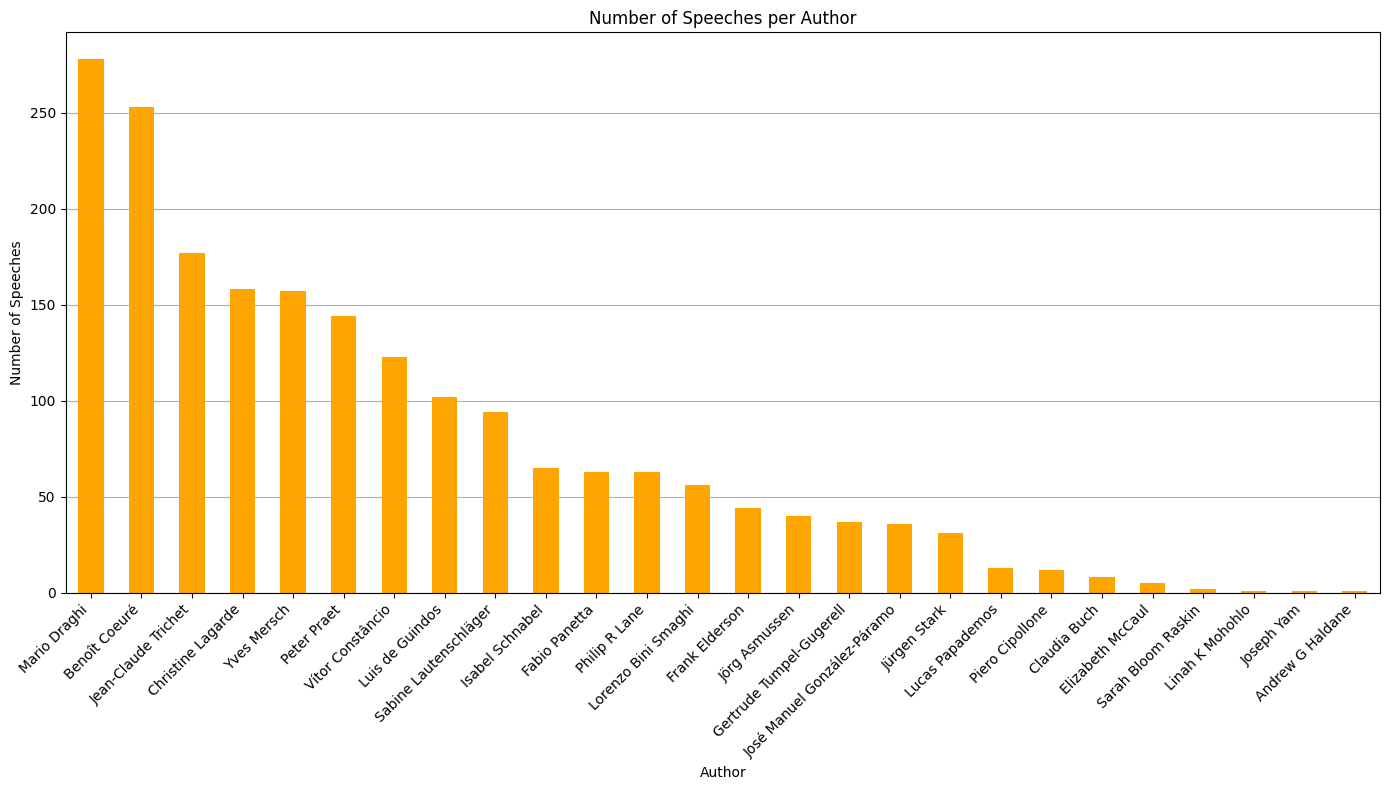

In [14]:
# # Average word count per speech by year
# average_word_count = speeches.groupby('year')['text_length'].mean()

# plt.figure(figsize=(12, 6))
# sns.lineplot(x=average_word_count.index, y=average_word_count.values, marker='o', color='purple')
# plt.title("Average Word Count per Speech by Year")
# plt.xlabel("Year")
# plt.ylabel("Average Word Count")
# plt.grid(True)
# plt.show()

# Count number of speeches per author
speeches_per_author = speeches['speaker_name'].value_counts()

# Bar chart for number of speeches per author
plt.figure(figsize=(14, 8))
speeches_per_author.plot(kind='bar', color='orange')
plt.title("Number of Speeches per Author")
plt.xlabel("Author")
plt.ylabel("Number of Speeches")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Gender representation over time

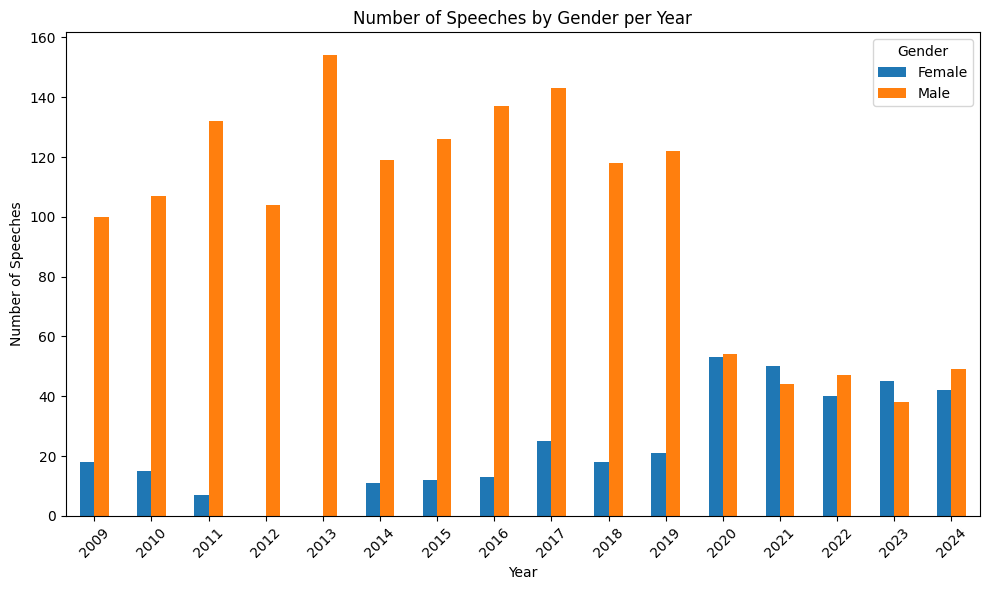

In [15]:
# Group by year and gender and count the number of speeches
gender_counts = speeches.groupby(['year', 'gender']).size().unstack(fill_value=0)

# Plotting
gender_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels and title
plt.title('Number of Speeches by Gender per Year')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.tight_layout()

# Show plot
plt.show()


The gender representation trend provides insights into the diversity of speakers over time : clear augmentation of women speakers in 2020, which corresponds to Christine Lagarde's arrival at the head of the BCE, top speaker in women

Speeches length analysis

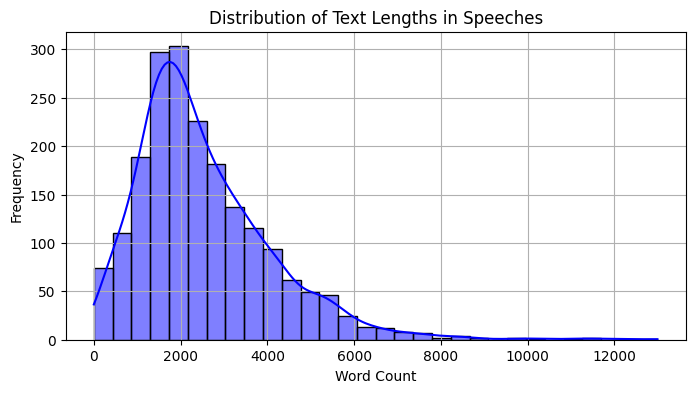

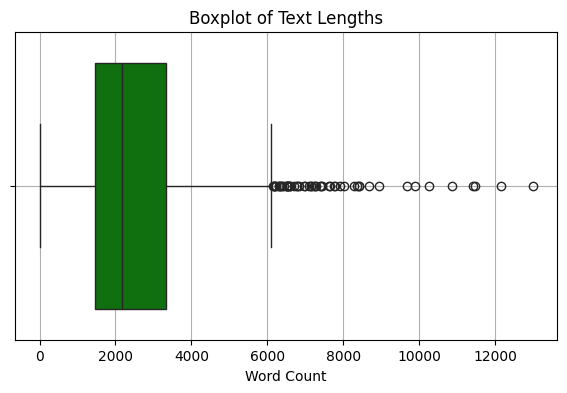

In [16]:
# Word count for each speech
speeches['text_length'] = speeches['speech_content'].apply(lambda x: len(str(x).split()))

# Distribution of text lengths
plt.figure(figsize=(8, 4))
sns.histplot(speeches['text_length'], bins=30, kde=True, color='blue')
plt.title("Distribution of Text Lengths in Speeches")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(7, 4))
sns.boxplot(data=speeches, x='text_length', color='green')
plt.title("Boxplot of Text Lengths")
plt.xlabel("Word Count")
plt.grid(True)
plt.show()


The histogram of speech lengths helps us understand the variability in content richness.
Plot histograms or boxplots to identify outliers or inconsistencies.

### Topic exploration

Word Frequency Analysis and Word Cloud Visualization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


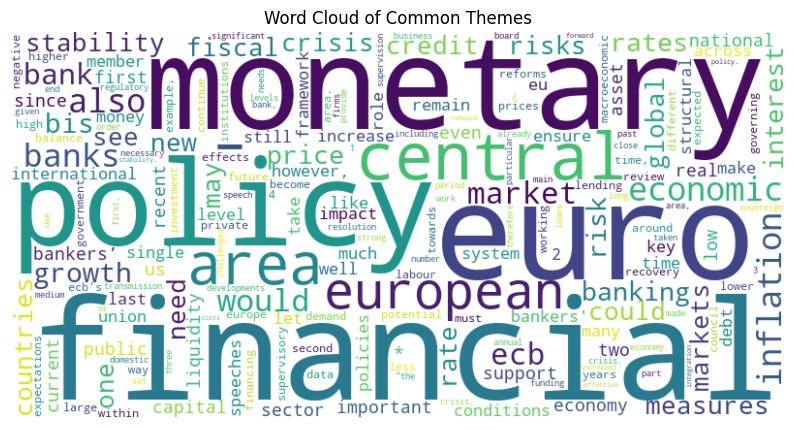

In [18]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Combine all speeches into one text
all_text = " ".join(speeches['speech_content'].dropna())

# Normalize to lowercase and count word frequencies
words = [word.lower() for word in all_text.split()]
word_counts = Counter(words)

# Filter out common stopwords (in english)
stop_words = set(stopwords.words("english"))
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stop_words}

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(filtered_word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Common Themes")
plt.show()

The word cloud helps you visualize common themes by displaying frequently occurring words in larger fonts.

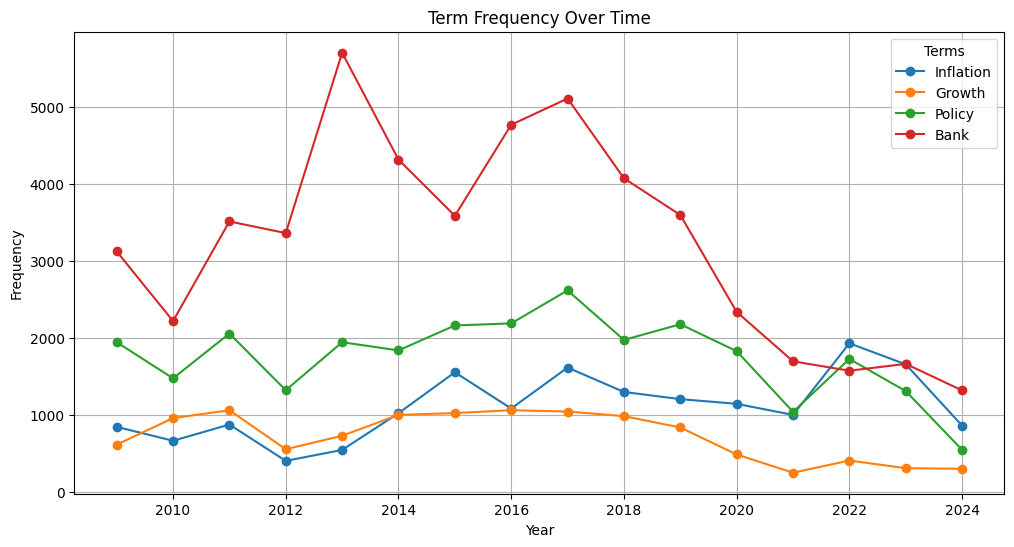

In [ ]:
# # Example: Tracking the frequency of specific terms over time
# terms_to_track = ["inflation", "growth", "policy", "bank"]

# # Create a column for each term to count occurrences in each speech
# for term in terms_to_track:
#     speeches[term] = speeches['speech_content'].apply(lambda x: str(x).lower().count(term))

# # Group by year and sum term frequencies
# term_trends = speeches.groupby('year')[terms_to_track].sum()

# # Plot term trends
# plt.figure(figsize=(12, 6))
# for term in terms_to_track:
#     plt.plot(term_trends.index, term_trends[term], marker='o', label=term.capitalize())

# plt.title("Term Frequency Over Time")
# plt.xlabel("Year")
# plt.ylabel("Frequency")
# plt.legend(title="Terms")
# plt.grid(True)
# plt.show()

Using TFIDF scores

In [ ]:
# from sklearn.decomposition import NMF, PCA
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline

In [20]:
vectorizer = TfidfVectorizer(
    stop_words="english",
    min_df=15,
    max_df=0.8, # not appear in more than 80% of the doc
    ngram_range=(1, 3),
    token_pattern=r"\b[a-zA-Z]{4,}\b", # removes numbers
)
X_ = vectorizer.fit_transform(speeches["speech_content"].values)

In [21]:
cols = vectorizer.get_feature_names_out()
print(len(cols))
list(cols)[:6]

24442


['aachen', 'abandon', 'abandoned', 'abated', 'abide', 'ability']

To reduce the impact over large  `tfidf` coefficients, we use the log transformationl $x \mapsto log(1+x)$ 

In [22]:
tfidf_matrix = X_.toarray() # convert the TF-IDF matrix as a dense array
X_tfidf = pd.DataFrame(np.log1p(tfidf_matrix), index=speeches["speech_content"].index, columns=cols)

Wordcloud according to the TDIDF scores

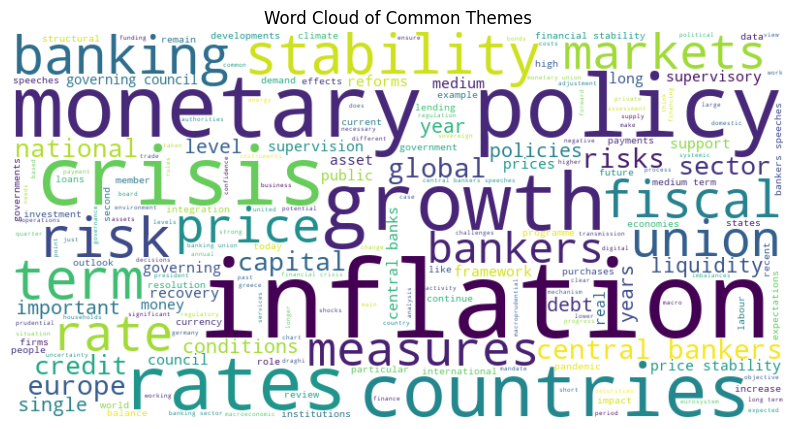

In [23]:
# Calculate the sum of the TF-IDF scores for each term across all speeches
sum_tfidf_scores = tfidf_matrix.sum(axis=0)

# Create a dictionary with words as keys and their total TF-IDF score as values
word_freq = dict(zip(cols, sum_tfidf_scores))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Common Themes")
plt.show()


Separate speeches from men and women speakers

In [24]:
speeches

id                  path  menu_id  \
0      6657  /review/r090217b.pdf      256   
1      6660  /review/r090217e.pdf      256   
2      6661  /review/r090218a.pdf      256   
3      6665  /review/r090218e.pdf      256   
4      6666  /review/r090219a.pdf      256   
...     ...                   ...      ...   
1959  37101  /review/r241126s.pdf       60   
1960  37111  /review/r241127f.pdf       60   
1961  37112  /review/r241127g.pdf       60   
1962  37137  /review/r241202b.pdf       60   
1963  37163  /review/r241206b.pdf       60   

                                            short_title  \
0     Jean-Claude Trichet: Ten years of the euro - s...   
1     Lucas Papademos: Tackling the financial crisis...   
2     Jean-Claude Trichet: Macroeconomic policies, i...   
3     Lorenzo Bini Smaghi: Regulation and supervisor...   
4     Jean-Claude Trichet: Interview with China Finance   
...                                                 ...   
1959  Christine Lagarde: Follow the money - channell...   
1960   Philip R Lane: Monetary policy under uncertainty   
1961  Elizabeth McCaul: Objects in the rearview mirr...   
1962  Philip R Lane: The 25th anniversary of the Eur...   
1963  Christine Lagarde: Hearing of the Committee on...   

                                             long_title  \
0     Speech by Mr Jean-Claude Trichet, President of...   
1     Speech by Mr Lucas Papademos, Vice President o...   
2     Address by Mr Jean-Claude Trichet, President o...   
3     Speech by Mr Lorenzo Bini Smaghi, Member of th...   
4     Interview by Mr Jean-Claude Trichet, President...   
...                                                 ...   
1959  <p>Speech by Ms Christine Lagarde, President o...   
1960  <p><span>Keynote speech by Mr Philip R Lane, M...   
1961  <p><span>Keynote speech by Ms Elizabeth McCaul...   
1962  <p>Remarks by Mr Philip R Lane, Member of the ...   
1963  <p><span>Speech by Ms Christine Lagarde, Presi...   

             publication_start_date language  pdf_file_size  pdf_pages  \
0     2009-02-17T11:05:00.000+01:00       en             53          8   
1     2009-02-17T11:05:00.000+01:00       en             55          8   
2     2009-02-18T11:05:00.000+01:00       en             29          3   
3     2009-02-18T11:05:00.000+01:00       en             37          6   
4     2009-02-19T11:05:00.000+01:00       en             20          3   
...                             ...      ...            ...        ...   
1959                     2024-11-28       en            339          8   
1960                     2024-11-29       en           3849         30   
1961                     2024-11-29       en             16          6   
1962                     2024-12-02       en            263          5   
1963                     2024-12-06       en              9          4   

      has_content  ...                                     speech_content  \
0           False  ...  Jean-Claude Trichet: Ten years of the euro – s...   
1           False  ...  Lucas Papademos: Tackling the financial crisis...   
2           False  ...  Jean-Claude Trichet: Macroeconomic policies, i...   
3           False  ...  Lorenzo Bini Smaghi: Regulation and supervisor...   
4           False  ...  Jean-Claude Trichet: Interview with China Fina...   
...           ...  ...                                                ...   
1959         True  ...  (cid:0)(cid:2)(cid:3)(cid:3)(cid:4)(cid:5)\n(c...   
1960         True  ...  (cid:0)(cid:2)(cid:3)(cid:3)(cid:4)(cid:5)\n(c...   
1961         True  ...  Elizabeth McCaul: Objects in the rearview mirr...   
1962         True  ...  (cid:0)(cid:2)(cid:3)(cid:3)(cid:4)(cid:5)\n(c...   
1963         True  ...  Christine Lagarde: Hearing of the Committee on...   

           topics abstract         speaker_name  gender confidence  \
0            None     None  Jean-Claude Trichet    male       1.00   
1            None     None      Lucas Papademos    male       0.99   
2            N

In [27]:
speeches_men = speeches[speeches['gender']=='male']
speeches_women = speeches[speeches['gender']=='female']
print(f'Number of speeches by men: {len(speeches_men)}')
print(f'Number of speeches by women : {len(speeches_women)}')

Number of speeches by men: 1594
Number of speeches by women : 370


Statistical Validity:

If you try to compare trends or characteristics between male and female speakers, the smaller sample size for women might lead to less reliable conclusions.

Feature Engineering:
Extract additional features such as:
Sentiment analysis scores.
Topics or keywords using NLP techniques like TF-IDF or topic modeling.

Actions:
Focus on Gender Differences in Sentiment Analysis:
Group the speeches by speaker gender (if metadata is available).
Calculate sentiment scores (using tools like VADER or TextBlob) and analyze distributions across genders.
Hypothesis Testing:
Formulate hypotheses, e.g., "Do male and female central bankers use different tones during economic crises?"
Validate them using statistical tests or machine learning models.


Task 3: Defining Research Objectives
Clarify Gender-Specific Sentiment Analysis:

Define how you will evaluate gender differences in sentiment. For example:
Compare sentiment scores between male and female speakers.
Examine if certain themes are more positively/negatively discussed by a specific gender.
Select Sentiment Analysis Tool:

Choose a sentiment analysis model or library (e.g., VADER, Hugging Face models).
Ensure it can handle the language used in central bank speeches.
Create a Hypothesis:

Draft testable hypotheses related to gender differences in sentiment.
E.g., "Speeches by female speakers will exhibit higher positive sentiment in discussing inclusive economic policies compared to male speakers."
Plan Statistical Tests:

Identify statistical tests (e.g., t-tests, ANOVA) to validate hypotheses.
Consider visualizations (e.g., boxplots, histograms) to support findings.

In [ ]:

def load_loughran_mcdonald_dictionary(cache_dir="data", force_reload=False):
    """
    Software Repository for Accounting and Finance by Bill McDonald
    https://sraf.nd.edu/loughranmcdonald-master-dictionary/
    """
    filename = (
        clean_directory_path(cache_dir)
        / "Loughran-McDonald_MasterDictionary_1993-2021.csv"
    )
    if (filename.exists()) & (~force_reload):
        logger.info(f"logging from cache file: {filename}")
    else:
        logger.info("loading from external source")
        id = "17CmUZM9hGUdGYjCXcjQLyybjTrcjrhik"
        url = f"https://docs.google.com/uc?export=download&confirm=t&id={id}"        
        subprocess.run(f"wget -O '{filename}' '{url}'", shell=True, capture_output=True)
    return pd.read_csv(filename)

### ANALYTICS AND LEARNING STRATEGY

The analytics and machine learning methodologies section accounts for:

- A detailed explanation of the foundational algorithm.

- A description of the data partitioning strategy for training, validation and test.

- An overview of the parameter selection and optimization process.

Topic Modeling by Gender
Use techniques like Latent Dirichlet Allocation (LDA) to identify dominant topics in speeches by men and women.

Sentiment Analysis Trends
Examine sentiment changes for both genders over time to spot unique pattern

### Sentiment Analysis

In [31]:
from skfin.plot import line
from skfin.text import coefs_plot, show_text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

1: Loughran-McDonals

In [28]:
logger = logging.getLogger(__name__)

def load_loughran_mcdonald_dictionary(cache_dir="data", force_reload=False):
    """
    Loads the Loughran-McDonald Master Dictionary.
    If the file doesn't exist locally, downloads it from the external source.
    
    Parameters:
        cache_dir (str): Directory to cache the file.
        force_reload (bool): Whether to force downloading the file again.
    
    Returns:
        pd.DataFrame: Loaded dictionary as a DataFrame.
    """
    # Ensure the cache directory exists
    cache_dir = Path(cache_dir)
    cache_dir.mkdir(parents=True, exist_ok=True)
    
    # Filepath for the dictionary
    filename = cache_dir / "Loughran-McDonald_MasterDictionary_1993-2021.csv"
    
    if filename.exists() and not force_reload:
        logger.info(f"Loading from cache file: {filename}")
    else:
        logger.info("Loading from external source")
        id = "17CmUZM9hGUdGYjCXcjQLyybjTrcjrhik"
        url = f"https://docs.google.com/uc?export=download&id={id}"
        
        try:
            # Download file using requests
            response = requests.get(url, stream=True)
            response.raise_for_status()  # Raise an error for bad HTTP status codes
            
            with open(filename, "wb") as f:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)
            logger.info(f"Downloaded file to {filename}")
        except requests.RequestException as e:
            logger.error(f"Error downloading file: {e}")
            raise
    
    # Ensure the file exists after the operation
    if not filename.exists():
        raise FileNotFoundError(f"Failed to download file: {filename}")
    
    # Load the CSV file into a DataFrame
    return pd.read_csv(filename)


In [ ]:
lm = load_loughran_mcdonald_dictionary()

In [48]:
X_men = speeches_men['speech_content']
X_women = speeches_women['speech_content']
funcs = {
    "negative": lambda x: x.Negative > 0,
    "positive": lambda x: x.Positive > 0,
    "all": lambda x: x.Word.notna(),
}

def get_total_count(X, lm, func):
    m = CountVectorizer(vocabulary=lm.loc[func].Word.str.lower().values)
    return pd.DataFrame(m.fit_transform(X).toarray(), index=X.index).sum(axis=1)


lm_counts_men = pd.concat({k: get_total_count(X_men, lm, v) for k, v in funcs.items()}, axis=1)
lm_counts_women = pd.concat({k: get_total_count(X_women, lm, v) for k, v in funcs.items()}, axis=1)

In [49]:
lm_counts_men['date'] = pd.to_datetime(speeches_men['converted_date'])
lm_counts_men = lm_counts_men.set_index('date')
lm_counts_women['date'] = pd.to_datetime(speeches_women['converted_date'])
lm_counts_women = lm_counts_women.set_index('date')


In [ ]:
# Calculate sentiment score for women and men 
sentiment_women = (
    lm_counts_women.pipe(lambda x: (x.positive - x.negative) / x["all"])
    .resample("B")
    .last()
    .ffill()
)
sentiment_men = (
    lm_counts_men.pipe(lambda x: (x.positive - x.negative) / x["all"])
    .resample("B")
    .last()
    .ffill()
)

# two rows one column
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    subplot_titles=["Sentiment Over Time: Men", "Sentiment Over Time: Women"],
)

# men's sentiment
fig.add_trace(
    go.Scatter(
        x=sentiment_men.index,
        y=sentiment_men,
        mode='lines+markers',
        name="Men's Sentiment",
        line=dict(color='blue', width=1.5),
        marker=dict(size=4),
        showlegend=False,
    ),
    row=1, col=1
)
# women's sentiment
fig.add_trace(
    go.Scatter(
        x=sentiment_women.index,
        y=sentiment_women,
        mode='lines+markers',
        name="Women's Sentiment",
        line=dict(color='red', width=1.5),
        marker=dict(size=4),
        showlegend=False
    ),
    row=2, col=1
)

fig.update_layout(
    title="Sentiment Analysis Over Time",
    # xaxis_title="Date",
    yaxis_title="Sentiment Score",
    xaxis=dict(showgrid=True, tickangle=45),
    yaxis=dict(showgrid=True),
    template="plotly_white",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)
fig.show()


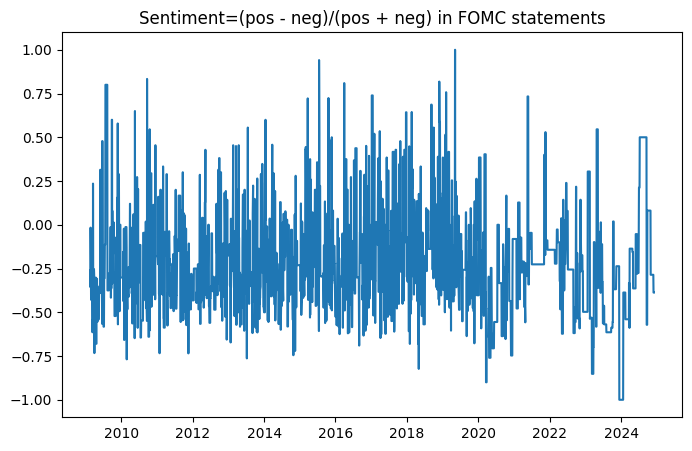

In [39]:
line(
    lm_counts_men.pipe(lambda x: (x.positive - x.negative) / (x.positive + x.negative))
    .resample("B")
    .last()
    .ffill(),
    legend=False,
    title="Sentiment=(pos - neg)/(pos + neg) in FOMC statements",
)

2: With transformers
preprocess the text first to remove stop words, punctuation, special characters etc.

In [ ]:
import re
import string
# nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)     # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions (e.g., @user)
    text = re.sub(r'[^a-zA-Z\s]', '', text)    # Remove special characters and numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])     # Tokenize the text and remove stopwords
    text = ' '.join(text.split()) # Remove extra whitespace
    return text

# Apply preprocessing
speeches['processed_content'] = speeches['speech_content'].apply(preprocess_text)

# Display the length of the original and processed text
speeches['original_length'] = speeches['speech_content'].apply(len)
speeches['processed_length'] = speeches['processed_content'].apply(len)

# speeches[['speech_content', 'processed_content', 'original_length', 'processed_length']].head()

speech_content  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Jean-Claude Trichet: Ten years of the euro – successes and challenges\nSpeech by Mr Jean-Claude Trichet, President of the Europ

In [64]:
from transformers import pipeline

# Load sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply the model
speeches['sentiment'] = speeches['processed_content'].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])  # Limit to first 512 tokens


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [65]:
speeches[['speech_content', 'processed_content', 'sentiment']].head()

speech_content  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Jean-Claude Trichet: Ten years of the euro – successes and challenges\nSpeech by Mr Jean-Claude Trichet, President of the Europ

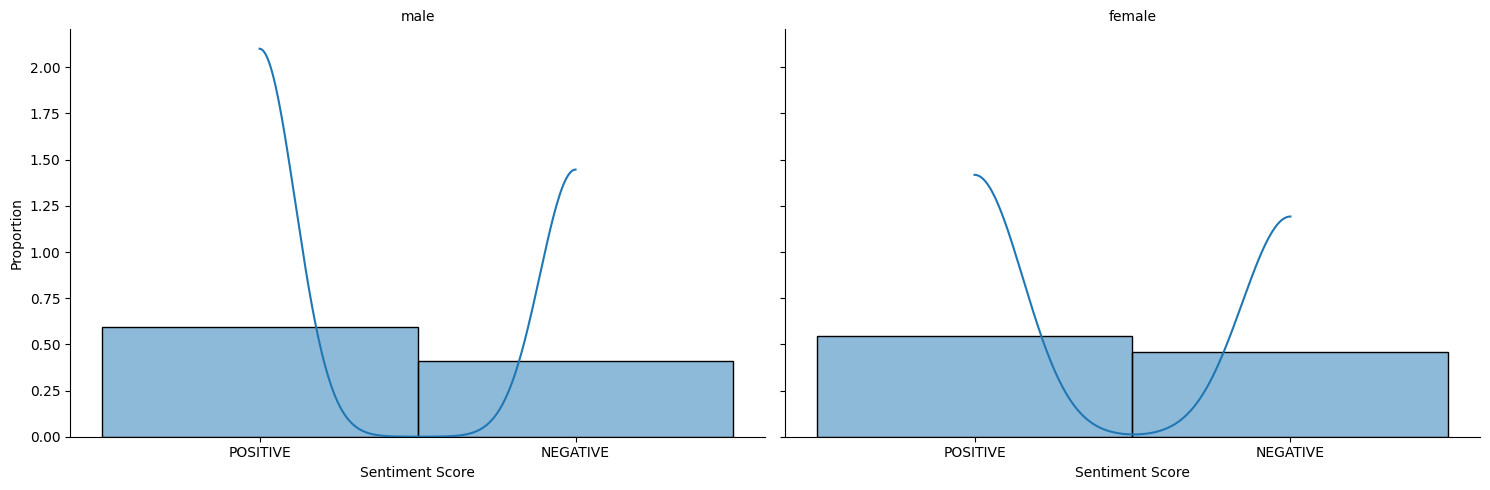

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with gender as a facet and normalize to proportions
g = sns.FacetGrid(speeches, col='gender', height=5, aspect=1.5)
g.map(sns.histplot, 'sentiment', bins=30, kde=True, stat='probability')

g.set_axis_labels("Sentiment Score", "Proportion")
g.set_titles("{col_name}")
plt.show()


longformer

In [ ]:
from transformers import LongformerTokenizer

# Initialize the tokenizer for Longformer
tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096")

# Apply tokenization to speech content and check length
speeches['token_length'] = speeches['speech_content'].apply(lambda x: len(tokenizer.encode(x)))

# Print some sample lengths
print(speeches[['speech_content', 'token_length']].head())

# to deal with long texts / too many tokens

In [ ]:
from transformers import pipeline

# Load Longformer for sentiment analysis
sentiment_pipeline = pipeline("sentiment-analysis", model="allenai/longformer-base-4096")

# Apply sentiment analysis
speeches['sentiment'] = speeches['processed_content'].apply(lambda x: sentiment_pipeline(x)[0]['label'])


config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

c:\Users\marie\OneDrive\Documents\cours\ensae\3A\ML for portfolio management\.venvML\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\marie\.cache\huggingface\hub\models--allenai--longformer-base-4096. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/597M [00:00<?, ?B/s]

Initializing global attention on CLS token...
Input ids are automatically padded to be a multiple of `config.attention_window`: 512


IndexError: index out of range in self

T5

In [ ]:
from transformers import pipeline

# Load the pre-trained T5 model for sentiment analysis
sentiment_pipeline = pipeline("text2text-generation", model="t5-small")

# Apply sentiment analysis
speeches['sentiment'] = speeches['processed_content'].apply(lambda x: sentiment_pipeline(f"sentiment: {x[:512]}")[0]['generated_text'])


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

c:\Users\marie\OneDrive\Documents\cours\ensae\3A\ML for portfolio management\.venvML\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\marie\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

c:\Users\marie\OneDrive\Documents\cours\ensae\3A\ML for portfolio management\.venvML\Lib\site-packages\transformers\generation\utils.py:1375: UserWarning:

Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.



Custom Sentiment Models: Fine-tune a transformer model like BERT on a labeled dataset specific to central bank language.

### Topic Modeling

In [ ]:
import spacy
from nltk.corpus import stopwords

# Load a spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Define a preprocessing function
def preprocess_text(text):
    doc = nlp(text.lower())  # Convert text to lowercase and tokenize
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply the function to your dataset
speeches['processed_content'] = speeches['speech_content'].apply(preprocess_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the text to a TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Limit the number of features
X = vectorizer.fit_transform(speeches['processed_content'])


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit the model to the data
lda.fit(X)

# Get the topics and display the top words for each topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


In [ ]:
from sklearn.decomposition import NMF

# Initialize the NMF model
nmf = NMF(n_components=5, random_state=42)

# Fit the model to the data
nmf.fit(X)

# Get the topics and display the top words for each topic
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate wordcloud for each topic
for topic_idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies({vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]})
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx + 1}")
    plt.axis("off")
    plt.show()


In [ ]:
import gensim
from gensim.corpora import Dictionary

# Prepare corpus for gensim LDA
texts = [text.split() for text in speeches['processed_content']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model with gensim
lda_gensim = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=lda_gensim, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_score}")


In [ ]:
topic_assignments = lda.transform(X)
speeches['topic'] = topic_assignments.argmax(axis=1)  # Assign to the topic with the highest probability


In [ ]:
topic_assignments = nmf.transform(X)
speeches['topic'] = topic_assignments.argmax(axis=1)


### EMPIRICAL RESULTS : BASELINE AND ROBUSTNESS

To effectively convey the empirical findings, separate the baseline results from the additional robustness tests. Within the primary empirical outcomes portion, include:

- Key statistical evaluations (for instance, if presenting a backtest – provide a pnl graph alongside the Sharpe ratio).

- Insights into what primarily influences the results, such as specific characteristics or assets that significantly impact performance.

The robustness of empirical tests section should detail:

- Evaluation of the stability of the principal finding against variations in hyperparameters or algorithmic modifications.

### CONCLUSION

Finally, the conclusive synthesis should recapitulate the primary findings, consider external elements that may influence the results, and hint at potential directions for further investigative work.